In [27]:
from model import DenoisingUNet
from utils import *
from data import mask_dataset
from tqdm import tqdm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
from glob import glob
import torch
import torch.nn as nn
sampleRate = 68.27

In [28]:
# Copy these parameters from the main script so that the loaded model has the same parameters.
N_sub = 11
batch_size = 32
hidden_layers = 4
learning_rate = 5e-4
num_epochs = 20

## Load Test Data

In [29]:
test_path = "test"
test_files = glob(os.path.join(test_path, '*.npy'))
test_dataset = mask_dataset(data_path='test', f_min=1, f_max=10, N_sub=N_sub, sampleRate=sampleRate)
test_loader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True, shuffle=False)

In [52]:
val_dataset = mask_dataset(data_path='validation', f_min=1, f_max=10, N_sub=N_sub, sampleRate=sampleRate)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, shuffle=True)

In [30]:
criterion = nn.MSELoss()

## Load Trained Model

In [31]:
model = DenoisingUNet(input_bands=1, output_classes=1, hidden_channels=hidden_layers)
state = torch.load('./new_model_tests/new-model-5.pth')
model.load_state_dict(state['model_state_dict'])
model.eval();


## Get Reconstructions

In [53]:
losses = []
evals = []
outputs = []
for i, (eval_samples, masks) in tqdm(enumerate(val_loader)):
    samples = eval_samples .clone().detach()
    samples = torch.unsqueeze(samples.squeeze(), 1)
    output = model(samples)
    loss = criterion(eval_samples.squeeze(), output.squeeze()).item()
    print(f"Loss is: {loss}")
    losses.append(loss)
    evals.append(eval_samples.squeeze())
    outputs.append(output.detach().squeeze())

1it [00:00,  4.34it/s]

Loss is: 0.003784910775721073


2it [00:00,  4.44it/s]

Loss is: 0.003050706349313259


3it [00:00,  4.49it/s]

Loss is: 0.0026918796356767416


4it [00:00,  4.62it/s]

Loss is: 0.002564898692071438


5it [00:01,  4.51it/s]

Loss is: 0.0031167417764663696


6it [00:01,  4.50it/s]

Loss is: 0.002664918778464198


7it [00:01,  4.54it/s]

Loss is: 0.0031229949090629816


8it [00:01,  4.55it/s]

Loss is: 0.0031981365755200386


9it [00:01,  4.56it/s]

Loss is: 0.0027991305105388165


10it [00:02,  4.46it/s]

Loss is: 0.0033844762947410345


11it [00:02,  4.37it/s]

Loss is: 0.0027914547827094793


12it [00:02,  4.30it/s]

Loss is: 0.0026332878042012453


13it [00:02,  4.34it/s]

Loss is: 0.0028262219857424498


14it [00:03,  4.33it/s]

Loss is: 0.003681855509057641


15it [00:03,  4.25it/s]

Loss is: 0.002886206144466996


16it [00:03,  4.23it/s]

Loss is: 0.0031102111097425222
Loss is: 0.0029729455709457397


18it [00:04,  4.50it/s]

Loss is: 0.0033699506893754005


19it [00:04,  4.49it/s]

Loss is: 0.002800910035148263


20it [00:04,  4.41it/s]

Loss is: 0.0027691060677170753


21it [00:04,  4.53it/s]

Loss is: 0.002681535668671131
Loss is: 0.0031487620435655117


23it [00:05,  4.56it/s]

Loss is: 0.003021935233846307


24it [00:05,  4.14it/s]

Loss is: 0.0024503744207322598


25it [00:05,  4.17it/s]

Loss is: 0.002687987871468067
Loss is: 0.0030707844998687506


27it [00:06,  4.46it/s]

Loss is: 0.0029238334391266108


28it [00:06,  4.42it/s]

Loss is: 0.003045448800548911


29it [00:06,  4.34it/s]

Loss is: 0.002982713980600238


30it [00:06,  4.32it/s]

Loss is: 0.002858672058209777


31it [00:07,  4.34it/s]

Loss is: 0.004014697391539812


32it [00:07,  4.37it/s]

Loss is: 0.0036750808358192444


33it [00:07,  4.25it/s]

Loss is: 0.003308829152956605


34it [00:07,  4.26it/s]

Loss is: 0.0025097045581787825


35it [00:07,  4.35it/s]

Loss is: 0.0032955168280750513


36it [00:08,  4.33it/s]

Loss is: 0.00348471337929368


37it [00:08,  4.20it/s]

Loss is: 0.0029866755940020084


38it [00:08,  4.25it/s]

Loss is: 0.0030592826660722494


39it [00:08,  4.28it/s]

Loss is: 0.0029950113967061043


40it [00:09,  4.25it/s]

Loss is: 0.0029970123432576656


41it [00:09,  4.23it/s]

Loss is: 0.002768944716081023


42it [00:09,  4.27it/s]

Loss is: 0.002734603127464652


43it [00:09,  4.36it/s]

Loss is: 0.00306905061006546


44it [00:10,  4.28it/s]

Loss is: 0.002826632698997855


45it [00:10,  4.19it/s]

Loss is: 0.0032473301980644464


46it [00:10,  4.15it/s]

Loss is: 0.0038125813007354736


47it [00:10,  4.19it/s]

Loss is: 0.0028909819666296244


48it [00:11,  4.31it/s]

Loss is: 0.00315197859890759


49it [00:11,  4.32it/s]

Loss is: 0.0030638701282441616


50it [00:11,  4.26it/s]

Loss is: 0.003207470988854766


51it [00:11,  4.27it/s]

Loss is: 0.0030031660571694374


52it [00:11,  4.34it/s]

Loss is: 0.0030237867031246424


53it [00:12,  4.37it/s]

Loss is: 0.0030445230659097433


54it [00:12,  4.23it/s]

Loss is: 0.0031929879914969206


55it [00:12,  4.27it/s]

Loss is: 0.0034887930378317833


56it [00:12,  4.38it/s]

Loss is: 0.0029421215876936913


57it [00:13,  4.30it/s]

Loss is: 0.0034631930757313967


58it [00:13,  4.32it/s]

Loss is: 0.0032561824191361666


59it [00:13,  4.27it/s]

Loss is: 0.0029167644679546356


60it [00:13,  4.16it/s]

Loss is: 0.0028804270550608635


61it [00:14,  4.29it/s]

Loss is: 0.003336760913953185


62it [00:14,  4.29it/s]

Loss is: 0.003297854447737336


63it [00:14,  4.14it/s]

Loss is: 0.0027024077717214823


64it [00:14,  4.26it/s]

Loss is: 0.0025344870518893003


65it [00:15,  4.22it/s]

Loss is: 0.0024830568581819534


66it [00:15,  4.29it/s]

Loss is: 0.0028244720306247473


67it [00:15,  4.25it/s]

Loss is: 0.0028833963442593813


68it [00:15,  4.38it/s]

Loss is: 0.0028347009792923927
Loss is: 0.002952368464320898


70it [00:16,  4.41it/s]

Loss is: 0.0034227913711220026


71it [00:16,  4.30it/s]

Loss is: 0.0027843720745295286


72it [00:16,  4.36it/s]

Loss is: 0.0036044754087924957


73it [00:16,  4.33it/s]

Loss is: 0.0028481653425842524


74it [00:17,  4.30it/s]

Loss is: 0.003461953019723296


75it [00:17,  3.99it/s]

Loss is: 0.0029159116093069315


76it [00:17,  4.03it/s]

Loss is: 0.0030855799559503794


77it [00:17,  4.02it/s]

Loss is: 0.004027969669550657


78it [00:18,  4.07it/s]

Loss is: 0.0030149505473673344


79it [00:18,  4.09it/s]

Loss is: 0.002949278801679611


80it [00:18,  4.04it/s]

Loss is: 0.0026192229706794024


81it [00:18,  4.01it/s]

Loss is: 0.00324853602796793


82it [00:19,  4.02it/s]

Loss is: 0.002773635322228074


83it [00:19,  4.01it/s]

Loss is: 0.0037159628700464964


84it [00:19,  4.09it/s]

Loss is: 0.0030899187549948692


85it [00:19,  4.15it/s]

Loss is: 0.0030842383857816458


86it [00:20,  4.18it/s]

Loss is: 0.0036703511141240597


87it [00:20,  3.86it/s]

Loss is: 0.002899916609749198


88it [00:20,  4.02it/s]

Loss is: 0.0034512376878410578


89it [00:20,  4.05it/s]

Loss is: 0.002851092256605625


90it [00:21,  4.05it/s]

Loss is: 0.00353615521453321


91it [00:21,  4.03it/s]

Loss is: 0.0025540885981172323


92it [00:21,  3.97it/s]

Loss is: 0.0031274408102035522


93it [00:21,  4.05it/s]

Loss is: 0.003060746006667614


94it [00:22,  4.17it/s]

Loss is: 0.002918774029240012


95it [00:22,  4.22it/s]

Loss is: 0.003567593405023217


96it [00:22,  4.29it/s]

Loss is: 0.0029115662910044193
Loss is: 0.0038291660603135824


98it [00:22,  4.58it/s]

Loss is: 0.003246334381401539


99it [00:23,  4.52it/s]

Loss is: 0.0031855194829404354


100it [00:23,  4.38it/s]

Loss is: 0.0028774982783943415


101it [00:23,  4.44it/s]

Loss is: 0.0031308347824960947


102it [00:23,  4.57it/s]

Loss is: 0.0027371898759156466


103it [00:24,  4.49it/s]

Loss is: 0.003250331385061145


104it [00:24,  4.50it/s]

Loss is: 0.003003801917657256


105it [00:24,  4.47it/s]

Loss is: 0.0028086991515010595
Loss is: 0.0029847146943211555


107it [00:24,  4.45it/s]

Loss is: 0.0026975227519869804


108it [00:25,  4.45it/s]

Loss is: 0.0026674375403672457


109it [00:25,  4.48it/s]

Loss is: 0.00295438920147717


110it [00:25,  4.48it/s]

Loss is: 0.0031810200307518244


111it [00:25,  4.47it/s]

Loss is: 0.0028874934650957584


112it [00:26,  4.41it/s]

Loss is: 0.0035484374966472387


113it [00:26,  4.25it/s]

Loss is: 0.003224950050935149


114it [00:26,  4.28it/s]

Loss is: 0.002796018263325095


115it [00:26,  4.33it/s]

Loss is: 0.0032762624323368073


116it [00:26,  4.27it/s]

Loss is: 0.003390054451301694


117it [00:27,  4.25it/s]

Loss is: 0.002991518471390009


118it [00:27,  4.28it/s]

Loss is: 0.0033862709533423185


119it [00:27,  4.23it/s]

Loss is: 0.003266111947596073


120it [00:27,  4.14it/s]

Loss is: 0.0029533656779676676


121it [00:28,  4.10it/s]

Loss is: 0.0023970576003193855


122it [00:28,  4.05it/s]

Loss is: 0.0033556693233549595


123it [00:28,  4.03it/s]

Loss is: 0.003460976993665099


124it [00:28,  4.04it/s]

Loss is: 0.002709557767957449


125it [00:29,  3.91it/s]

Loss is: 0.0029603794682770967


126it [00:29,  3.98it/s]

Loss is: 0.0025813712272793055


127it [00:29,  3.91it/s]

Loss is: 0.0032415823079645634


128it [00:29,  4.00it/s]

Loss is: 0.003149555064737797


129it [00:30,  4.02it/s]

Loss is: 0.0033953413367271423


130it [00:30,  4.08it/s]

Loss is: 0.0027775170747190714


131it [00:30,  4.08it/s]

Loss is: 0.003059025853872299


132it [00:30,  4.08it/s]

Loss is: 0.0033665879163891077


133it [00:31,  4.06it/s]

Loss is: 0.003169390605762601


134it [00:31,  4.06it/s]

Loss is: 0.0031283798161894083


135it [00:31,  4.06it/s]

Loss is: 0.0033714077435433865


136it [00:31,  4.08it/s]

Loss is: 0.0030479133129119873


137it [00:32,  4.10it/s]

Loss is: 0.002868200885131955


138it [00:32,  4.13it/s]

Loss is: 0.0031816766131669283


139it [00:32,  4.17it/s]

Loss is: 0.0027226225938647985


140it [00:32,  4.19it/s]

Loss is: 0.002850510412827134


141it [00:33,  4.21it/s]

Loss is: 0.0027778930962085724


142it [00:33,  4.31it/s]

Loss is: 0.0029588339384645224


143it [00:33,  4.36it/s]

Loss is: 0.0024377538356930017


144it [00:33,  4.35it/s]

Loss is: 0.0027008948381990194


145it [00:34,  4.27it/s]

Loss is: 0.002699851058423519


146it [00:34,  4.25it/s]

Loss is: 0.0031827844213694334


147it [00:34,  4.30it/s]

Loss is: 0.003066282020881772


148it [00:34,  4.27it/s]

Loss is: 0.002835351275280118


149it [00:34,  4.23it/s]

Loss is: 0.002923659747466445


150it [00:35,  4.26it/s]

Loss is: 0.0025106773246079683


In [54]:
min_loss = np.argmax(losses)
outputs_ = [taper_filter(i, 1, 10, sampleRate) for i in outputs]

In [79]:
batch_idx = 40  # select batch with min loss
event = 0  # select one of 56 events
channel = 5  #if you want to do a line plot, pick channel

In [80]:
print(len(outputs_))
print(outputs[0].shape)

150
torch.Size([32, 11, 2048])


In [81]:
og = np.array(evals[batch_idx][event])
rec = np.array(outputs_[batch_idx][event])
bin_size = 5
cc_og = compute_moving_coherence(og, bin_size)
cc_rec = compute_moving_coherence(rec, bin_size)
cc_gain = cc_rec / cc_og

I chose channel 16 as it is the one that's more frequently targeted and blanked out (it's the center one),  
 so that's the most interesting channel to pick to see how the reconstruction is done.

In [82]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 8), sharex=True, sharey=True)
# pl1 = ax1.imshow(evals[batch_idx][event], aspect='auto', cmap='seismic')
# pl2 = ax2.imshow(outputs_[batch_idx][event], aspect='auto', cmap='seismic')
# # cbar = fig.colorbar(pl1, ax=ax2, shrink=0.95)

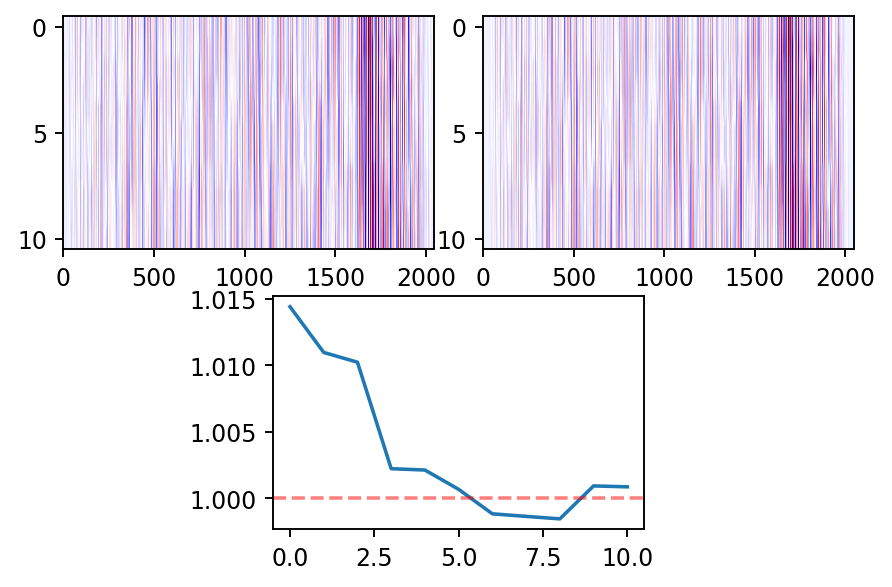

In [83]:
import matplotlib.gridspec as gridspec
plt.figure(dpi=170)
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.3)
ax1 = plt.subplot(gs[0, :2], )
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, 1:3])
ax1.imshow(evals[batch_idx][event], aspect='auto', cmap='seismic')
ax2.imshow(outputs_[batch_idx][event], aspect='auto', cmap='seismic')
ax3.plot(cc_gain)
ax3.axhline(y=1,linestyle='--',alpha=0.5,color='r')
plt.show()

## Wiggle for wiggle comparison on center channel

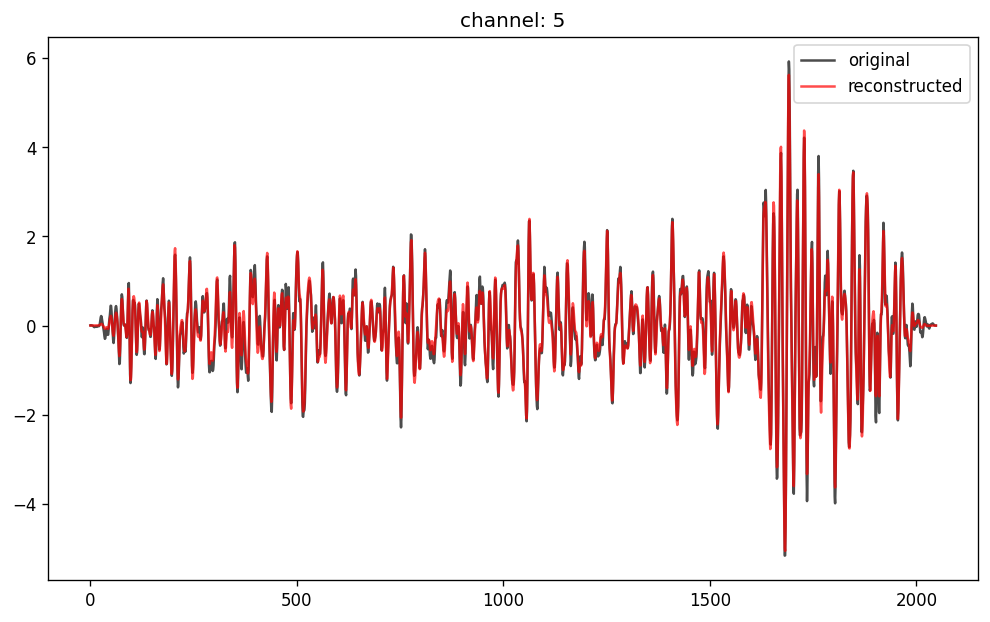

In [84]:
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(evals[batch_idx][event, channel], alpha=0.7, label='original', color='black')
plt.plot(outputs_[batch_idx][event, channel], alpha=0.7, label='reconstructed', color='red')
plt.title(f"channel: {channel}")
plt.legend()

This screenshot is from the original paper, for reference.

![Reference](./reference.png)